# Importing Libraries 

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

# Project 
## Electricity Cost Prediction Analysis 

In [4]:
train=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Datasets\Electricity Prediction Dataset\Dataset\Train.csv")
test=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Datasets\Electricity Prediction Dataset\Dataset\Test.csv")
submission=pd.read_csv(r"C:\Users\user\Desktop\Kaggle Datasets\Electricity Prediction Dataset\Dataset\Submission.csv")

In [5]:

# EDA
print(train.info())
print(train.describe())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11220 entries, 0 to 11219
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Site_Area                       11220 non-null  object 
 1   Structure_Type                  11220 non-null  object 
 2   Water_Consumption_Per_Building  11220 non-null  float64
 3   Recycling_Rate                  11220 non-null  float64
 4   Utilization_Rate                11220 non-null  float64
 5   Air_Quality_Index               11220 non-null  float64
 6   Issue_Resolution_Time           11220 non-null  float64
 7   Resident_Count                  11220 non-null  int64  
 8   Electricity_Cost                11220 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 789.0+ KB
None
       Water_Consumption_Per_Building  Recycling_Rate   Utilization_Rate  \
count                    11220.000000     11220.000000      11220.000000   


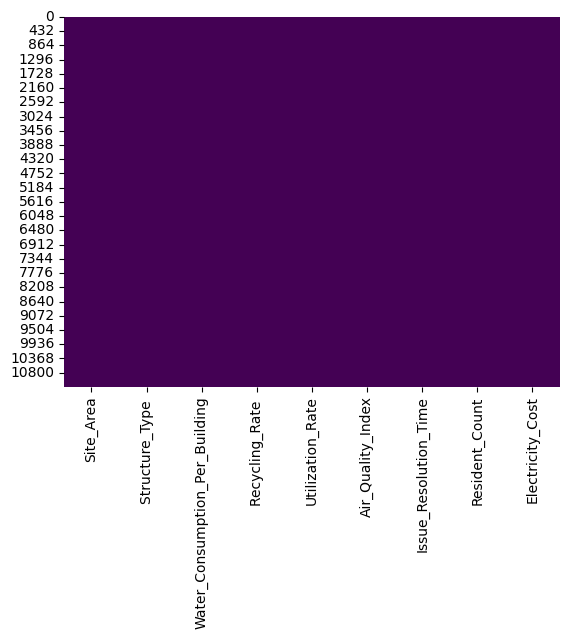

In [6]:
# Visualize missing values
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.show()


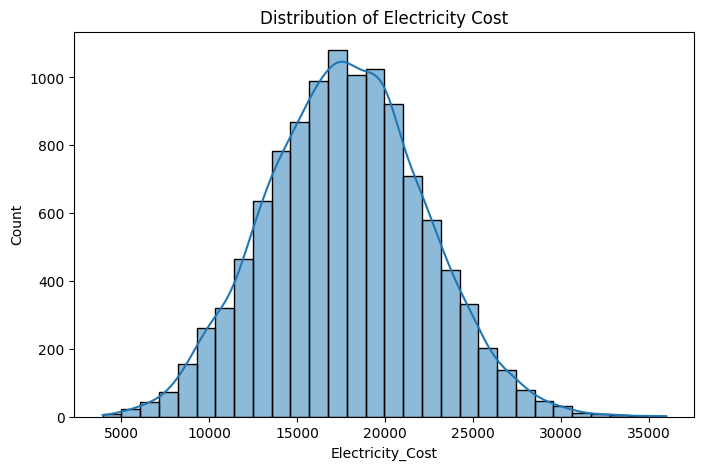

In [7]:
# Target distribution
plt.figure(figsize=(8,5))
sns.histplot(train['Electricity_Cost'], kde=True, bins=30)
plt.title('Distribution of Electricity Cost')
plt.show()

In [8]:
train.head()

,Site_Area,Structure_Type,Water_Consumption_Per_Building,Recycling_Rate,Utilization_Rate,Air_Quality_Index,Issue_Resolution_Time,Resident_Count,Electricity_Cost
0,Hebbal,Residential,1558.887420,38.143488,96.190774,60.329943,9.776145,333,15421.85624
1,Koramangala,Institutional,760.738916,30.365679,85.709589,29.613212,12.011880,306,22247.03278
2,Banashankari,Commercial,782.410030,33.219435,80.258544,60.630260,16.698976,482,19999.25905
3,Yelahanka,Commercial,536.149475,34.094487,74.981293,65.965449,20.128330,99,14641.76268
4,Malleshwaram,Commercial,544.149079,12.764772,94.415086,37.341041,1.564507,228,21492.92556


In [9]:
# Handling categorical variables
categorical_cols = train.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in categorical_cols:
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

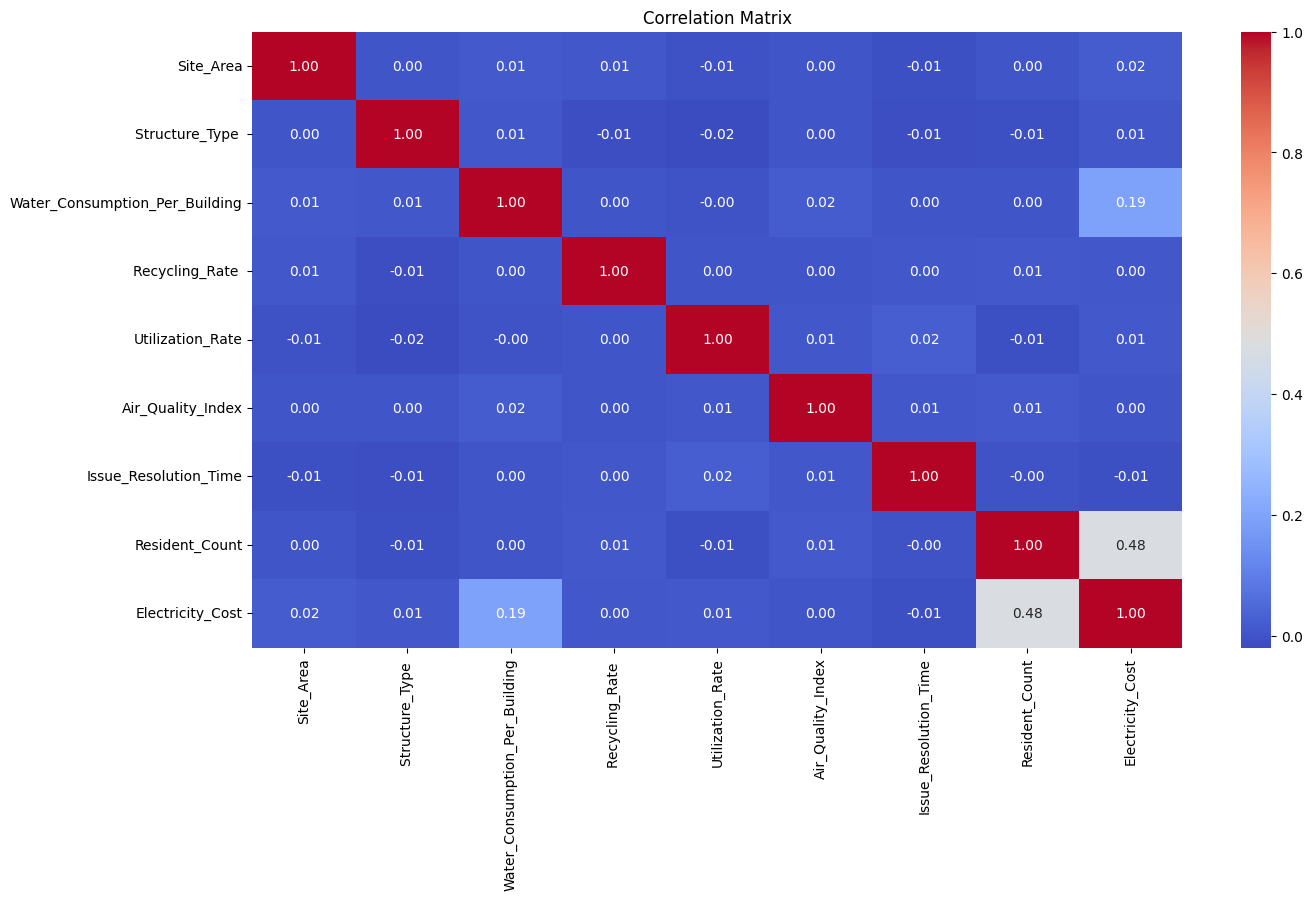

In [10]:
# Correlation matrix
corr = train.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
train.head()

,Site_Area,Structure_Type,Water_Consumption_Per_Building,Recycling_Rate,Utilization_Rate,Air_Quality_Index,Issue_Resolution_Time,Resident_Count,Electricity_Cost
0,4,3,1558.887420,38.143488,96.190774,60.329943,9.776145,333,15421.85624
1,7,2,760.738916,30.365679,85.709589,29.613212,12.011880,306,22247.03278
2,1,0,782.410030,33.219435,80.258544,60.630260,16.698976,482,19999.25905
3,10,0,536.149475,34.094487,74.981293,65.965449,20.128330,99,14641.76268
4,8,0,544.149079,12.764772,94.415086,37.341041,1.564507,228,21492.92556


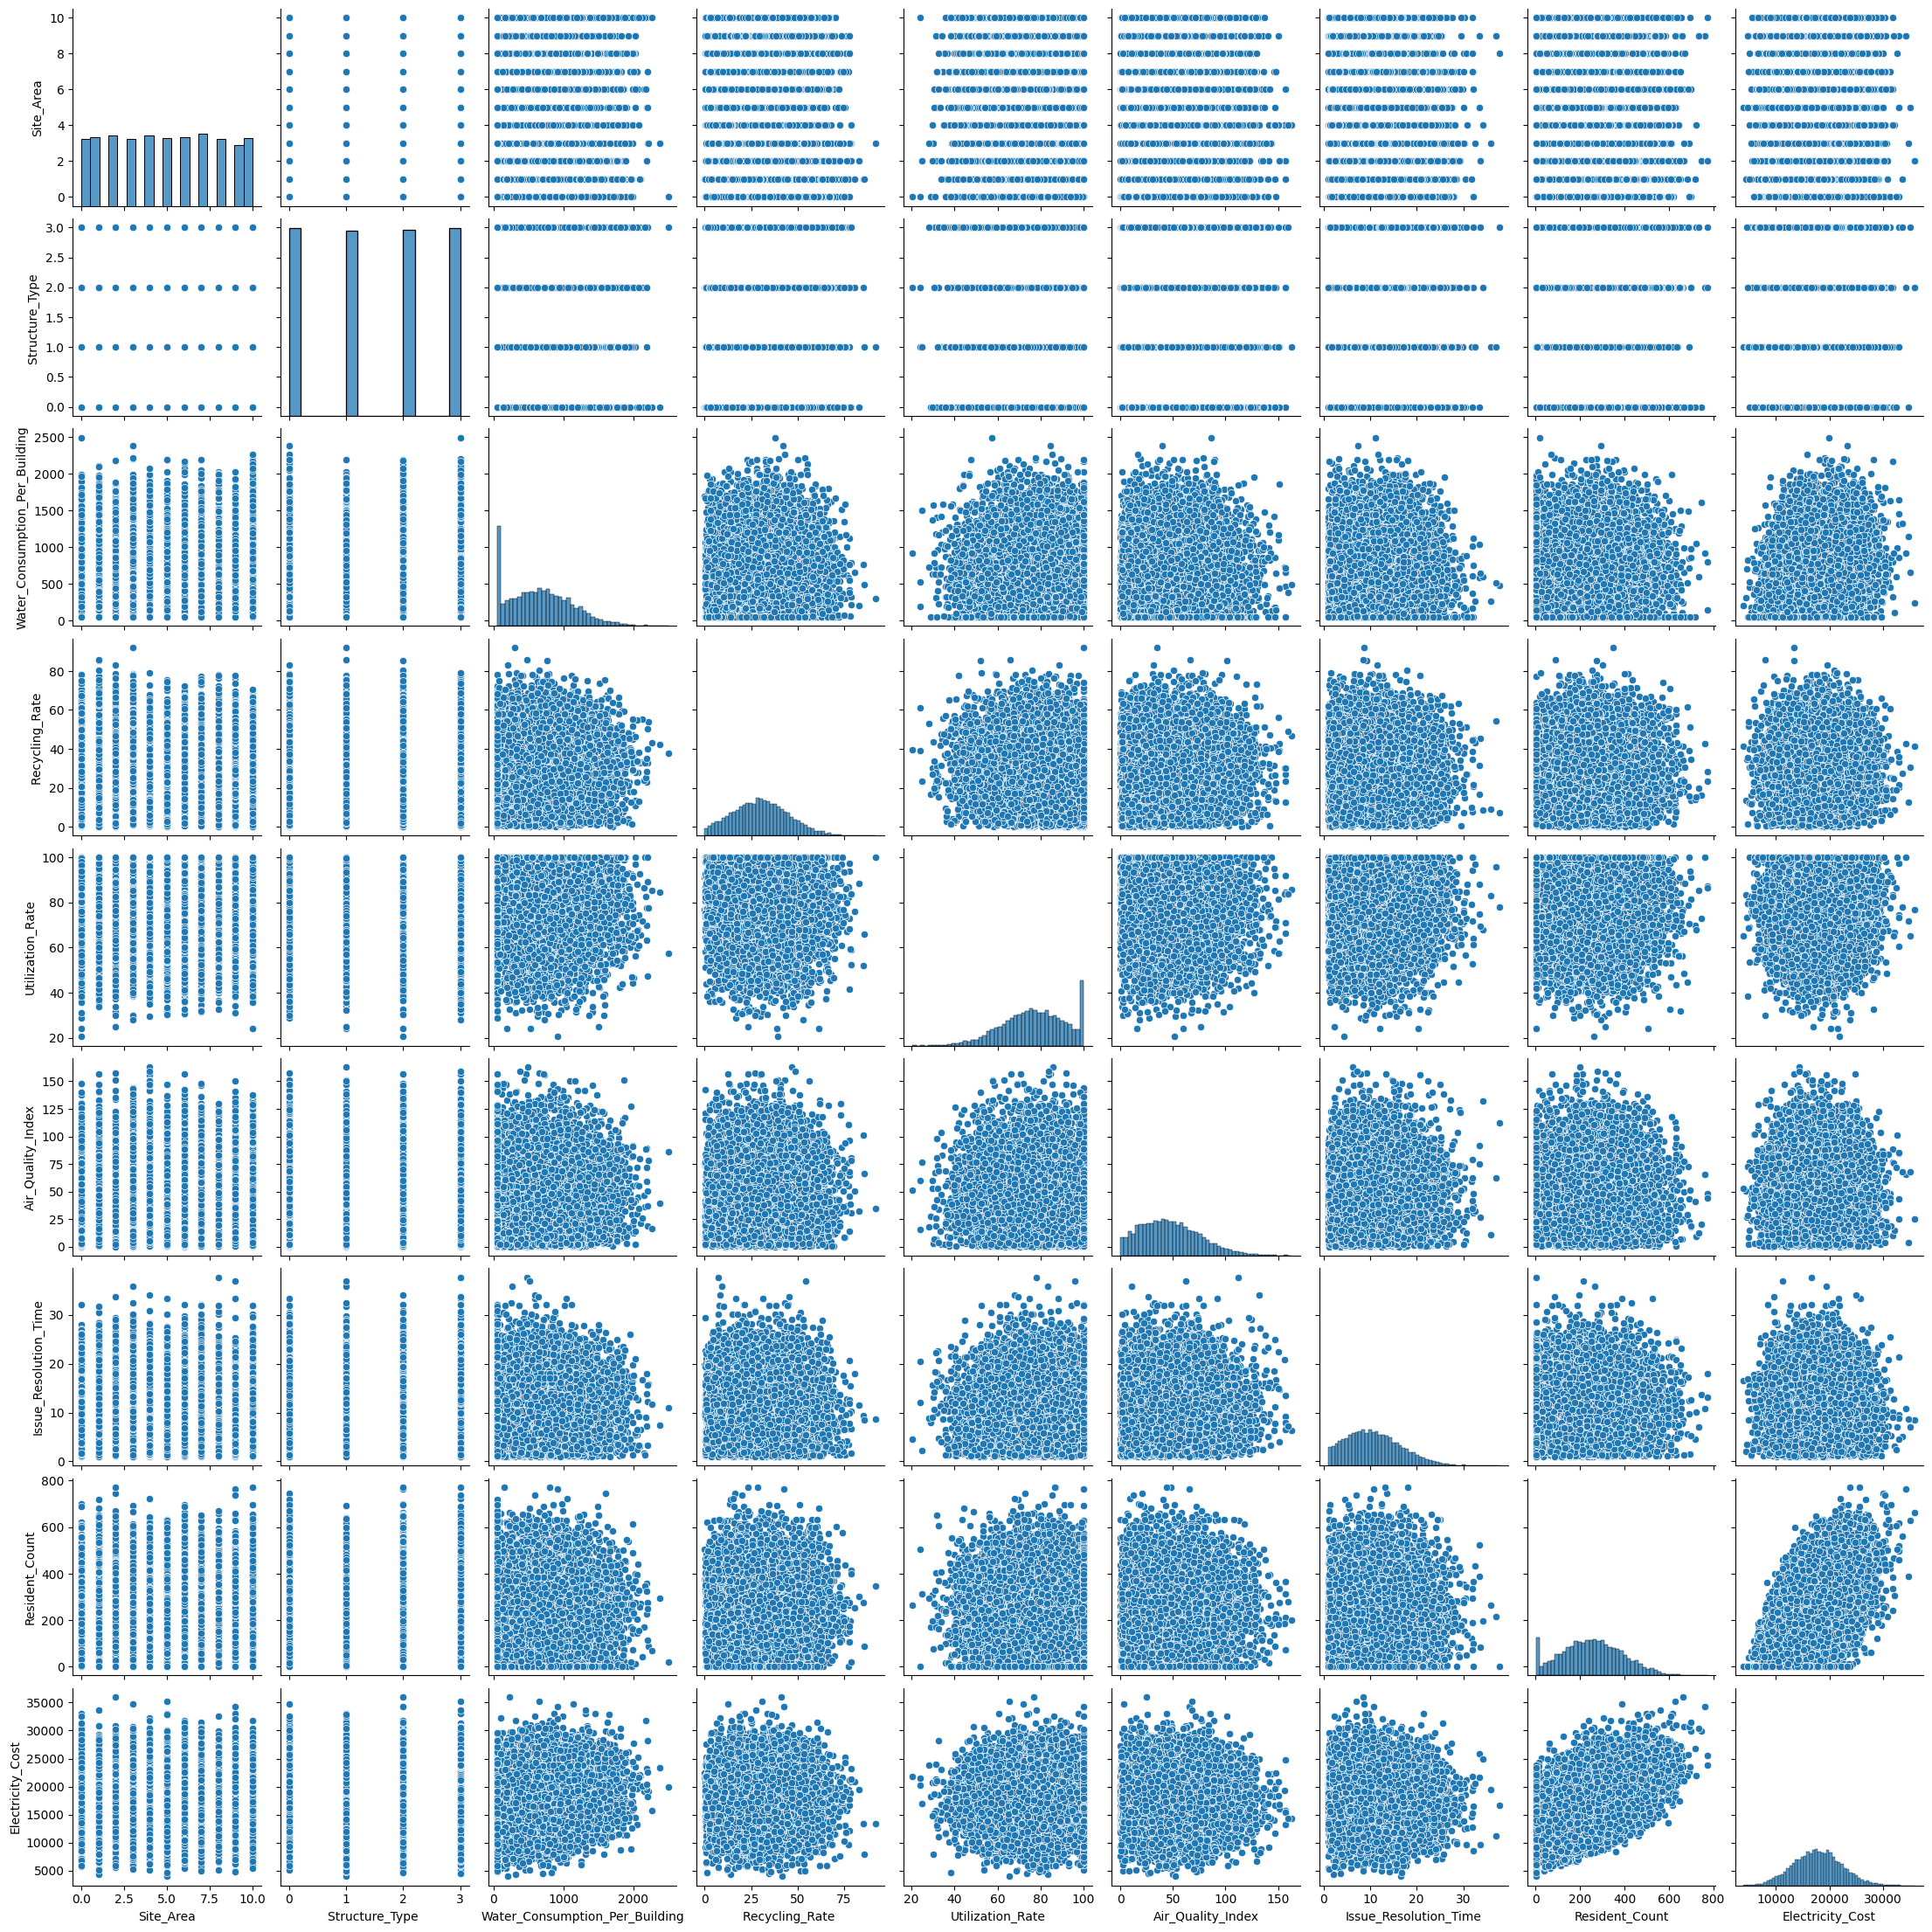

In [12]:
# Pairplot for numeric features
sns.pairplot(train.select_dtypes(include=np.number))
plt.show()

In [13]:
X = train.drop(columns=['Electricity_Cost'])
y = train['Electricity_Cost']

In [14]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_X = test[X.columns]
test_scaled = scaler.transform(test_X)

## Random Forest Regressor Model 

RMSE: 3975.7749836121775
R2 Score: 0.2222337911265524


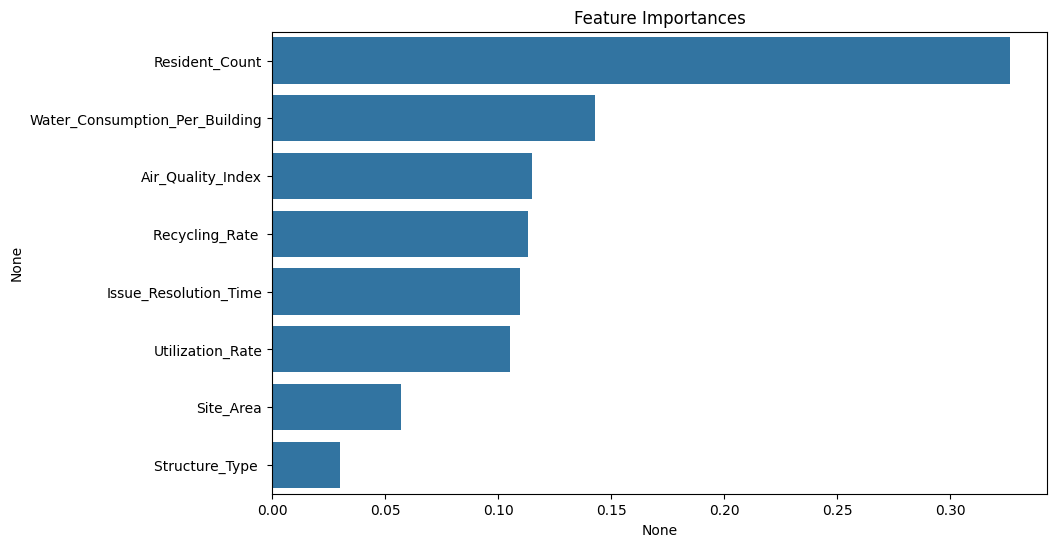

In [15]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

# Metrics
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))
print("R2 Score:", r2_score(y_val, y_pred))

# Feature importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importances")
plt.show()

# Predict on test
test_preds = rf.predict(test_scaled)

# Submission
submission['Electricity_Cost'] = test_preds
submission.to_csv('submission.csv', index=False)

## Linear Regression Model

In [16]:
model_lr=LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = rf.predict(X_val)
# Metrics
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_lr)))
print("R2 Score:", r2_score(y_val, y_pred_lr))

RMSE: 3975.7749836121775
R2 Score: 0.2222337911265524


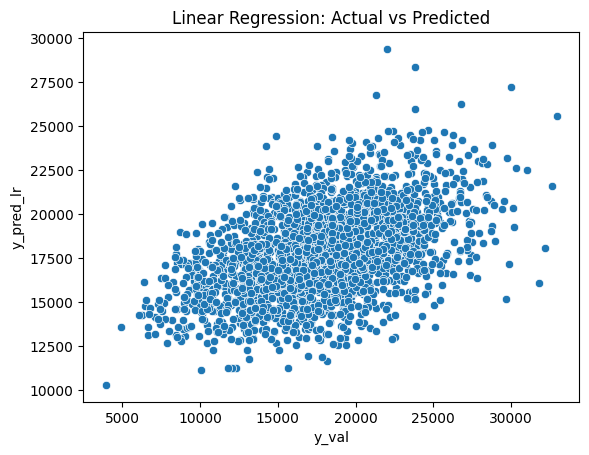

In [17]:
df_eval = pd.DataFrame({
    "y_val": y_val,
    "y_pred_lr": y_pred_lr
})
sns.scatterplot(data=df_eval, x="y_val", y="y_pred_lr")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


In [18]:
# Predict on test
test_preds_lr = model_lr.predict(test_scaled)
submission['Electricity_Cost'] = test_preds_lr
submission.to_csv('submission_linear.csv', index=False)

## XGB Regressor Model 

In [19]:
# XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
print("XGBRegressor RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_xgb)))
print("XGBRegressor R2 Score:", r2_score(y_val, y_pred_xgb))

# Predict on test
test_preds_xgb = xgb.predict(test_scaled)
submission['Electricity_Cost'] = test_preds_xgb
submission.to_csv('submission_xgb.csv', index=False)

XGBRegressor RMSE: 4033.7064734293513
XGBRegressor R2 Score: 0.1994028100079398


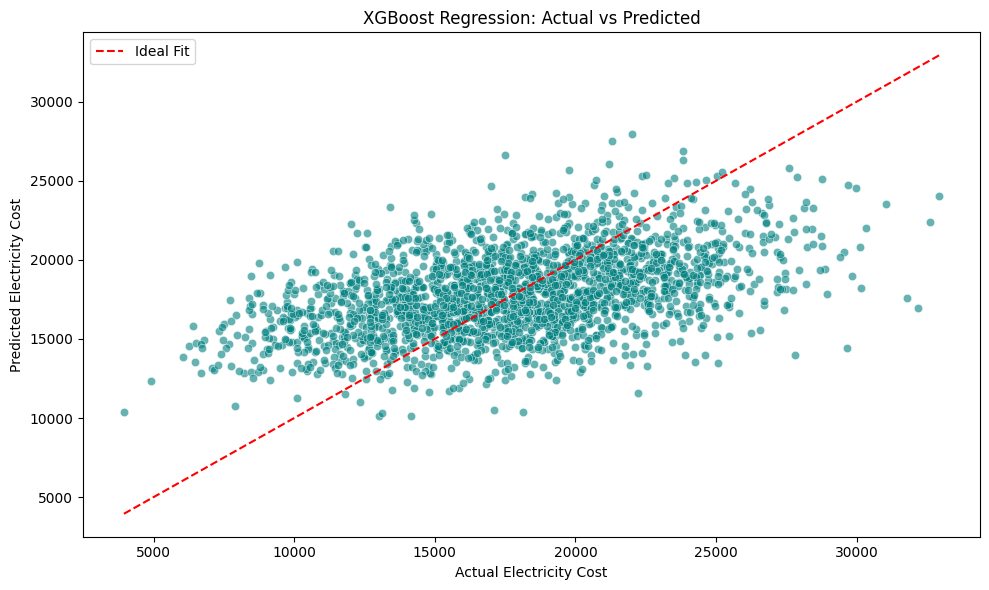

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred_xgb, color='teal', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Electricity Cost")
plt.ylabel("Predicted Electricity Cost")
plt.title("XGBoost Regression: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()


## K Neighbors Regressor Model

In [20]:
from sklearn.neighbors import KNeighborsRegressor
# KNeighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
print("KNeighbors Regressor RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_knn)))
print("KNeighbors Regressor R2 Score:", r2_score(y_val, y_pred_knn))

submission['Electricity_Cost'] = knn.predict(test_scaled)
submission.to_csv('submission_knn.csv', index=False)

KNeighbors Regressor RMSE: 4302.219194013243
KNeighbors Regressor R2 Score: 0.0892681094183696


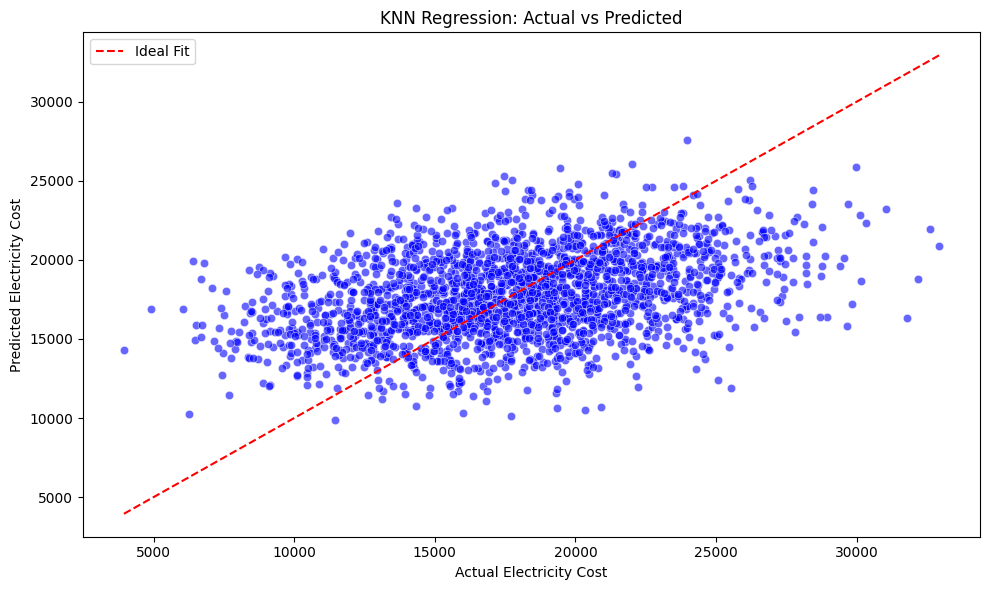

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred_knn, color='blue', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Electricity Cost")
plt.ylabel("Predicted Electricity Cost")
plt.title("KNN Regression: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()
